In [152]:
import ollama
import csv

import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Prompt
You are a linguistic expert evaluating the interpretability of two datasets. 

Evaluate the interpretability of the two sets of words below. A set is more interpretable if it reflects clear semantic patterns or categories, has meaningful diversity, and maintains contextual coherence across the words. Consider repetition only if it highlights important linguistic patterns. Choose the set that better meets these criteria


Dataset 1: {dataset1} 

Dataset 2: {dataset2}

Which dataset is more interpretable?

Respond ONLY with the dataset number  "1" or "2"

In [56]:
def more_interpretable(dataset1, dataset2):
    return ollama.generate(
        model='gemma2:9b', 
        options={'temperature': 0.001},
        system = '''You are a linguistic expert evaluating the interpretability of two datasets. 
        Evaluate the interpretability of the two sets of words below. A set is more interpretable if it reflects clear semantic patterns or categories, has meaningful diversity, and maintains contextual coherence across the words. Consider repetition only if it highlights important linguistic patterns. Choose the set that better meets these criteria
        ''',    
        prompt=f'''        
        Dataset 1: {dataset1}
        Dataset 2: {dataset2}

        Which dataset is more interpretable?
        Respond ONLY with the dataset number  "1" or "2"
    ''')['response']
     


In [57]:
# crea un objeto con numero de fila original, peso y texto
class Dataset:
    def __init__(self, Originalindex, weight, text):
        self.Originalindex = Originalindex
        self.weight = weight
        self.text = text

In [ ]:
# Leer el archivo CSV sin usar pandas
with open('tokens.csv') as f:
    reader = csv.reader(f)
    # Convertir cada fila es un objeto Dataset, row debe serun numero consecutivo el peso 5 y concatenando el texto
    filas = [Dataset(i, 5, ' '.join(row)) for i, row in enumerate(reader)]



In [ ]:

def Compara_interpretabilidad(filas):
    # hace un shuffle de las filas
    random.shuffle(filas)
    # Aplicar el método de burbuja para ordenar por interpretabilidad
    n = len(filas)
    for i in range(n-1):    
        # Si la fila actual es menos interpretable que la siguiente, le resto 1 al peso
        comparacion = more_interpretable(filas[i].text, filas[i+1].text)
        # si la variable comparacion contiene el caracter '2' la fila i le resto 1 al peso, si contiene 1 le resto 1 al peso de la fila i+1
        if comparacion.find('2') != -1:
            filas[i].weight -= 1
        else:
            filas[i+1].weight -= 1
    return 


In [60]:
def genera_top_k(filas, k):
    #mientras haya mas k filas 
    while len(filas) > k:
        print(len(filas))
        Compara_interpretabilidad(filas)
        # ordenar las filas por peso de mayor a menor
        filas.sort(key=lambda x: x.weight, reverse=True)        
        # elimino las filas con peso <= 0 a menos que sean las primeras k filas de la lista
        filas = [x for i, x in enumerate(filas) if x.weight > 0 or i < k]
    return filas

In [61]:
filas = genera_top_k(filas, 40)

1024
1024
1024
751
526
382
263
183
121
84
54
41


In [62]:
filas.sort(key=lambda x: x.weight, reverse=True)        
# imprimo el detalle de todas las fials
for fila in filas:
    print(fila.Originalindex, fila.weight, fila.text)
    

262 5  association  Roman  Roman  naval  communal  communal  Roman  Roman  architectural  urban
224 5  participants  participants  competitors  found  found  puzzles  puzzles  teams  teams  objects
643 5  schools  houses  families  houses  houses  installations  installations  flags  flags  relocate
815 4  killer  killer  character  theme  theme  designer  designer  superhero  superhero  character
64 4  actions  actions  commitment  commitment  destiny  destiny  independence  commitment  achievements  achievements
278 4  Glacier  Glacier water water  Glacier  Glacier land  Springs  Springs  Springs
737 4  theological  political  political  social  social  social  social  social  social  athletic
340 3  stuck  stuck  interaction  interaction  relation  relation  resonate  cooperation  relation  collaborating
215 3  districts  grassroots  grassroots  shelters  shelters  teams  security  security  goals  goals
818 3  tissues  plants  proteins  bacteria  bacteria  proteins  proteins  prote

In [ ]:
df = pd.DataFrame({
    "Indices Originales": [x.Originalindex for x in filas],
    "Words": [x.text for x in filas]
})

output_csv_path = "interpretable_tokens.csv"
df.to_csv(output_csv_path, index=False, header=False)

________

In [87]:
df = pd.read_csv('interpretable_tokens.csv')
df.columns = ['Original Index', 'Words']


print(df.head())

   Original Index                                              Words
0             224   participants  participants  competitors  foun...
1             643   schools  houses  families  houses  houses  in...
2             815   killer  killer  character  theme  theme  desi...
3              64   actions  actions  commitment  commitment  des...
4             278   Glacier  Glacier water water  Glacier  Glacie...


In [139]:
def giving_name(dataset):
    return ollama.generate(
            model='gemma2:9b', 
            options={'temperature': 0.001},
            system = '''You are a linguistic expert evaluating the interpretability of different datasets. 
            A set is more interpretable if it reflects clear semantic patterns or categories, 
            has meaningful diversity, and maintains contextual coherence across the words. 
            Consider repetition only if it highlights important linguistic patterns.
            Give a name for a set of words and explain why do you choose that name in one sentence.	
            ''',    
            prompt=f'''
            Generate 2 strings separated by a comma for dataset. Only include letters and space. Do not include \r or \n
            1 - a phrase describing the dataset's name 
            2 - a small sentence explaining why the name
            
            The format should be:
            "Dataset Name", "name description"

            Example:
            Dataset: tissues plants proteins bacteria bacteria proteins proteins proteins proteins genes
            Response:
            'Biological Building Blocks', 'This set focuses on fundamental components found within living organisms at various levels of organization.'

            Dataset: {dataset}
            
            
        ''')['response']
    

In [65]:
df['Words'][:3]

0     participants  participants  competitors  foun...
1     schools  houses  families  houses  houses  in...
2     killer  killer  character  theme  theme  desi...
Name: Words, dtype: object

In [68]:
text = []
for w in df['Words']:
    t = str(giving_name(w))
    text.append(t)


In [69]:
text

["'Collaborative Problem Solving', 'This dataset highlights the key elements involved in a group activity centered around solving challenges.' \n\n\n",
 '"Spatial Structures and Transitions", "This dataset highlights words related to physical locations, dwellings, and the act of moving or changing position." \n\n\n',
 '"Narrative Archetypes", "This dataset highlights recurring elements and roles commonly found in storytelling." \n\n\n',
 '"Thematic Crossroads", "This dataset explores concepts related to personal agency, responsibility, and life outcomes." \n\n\n',
 '"Frozen Water Cycle", "This dataset highlights the recurring theme of glacial melt and its impact on surrounding environments." \n\n\n',
 '"Intersecting Domains", "This dataset highlights concepts that often overlap and influence each other in human society." \n\n\n',
 '"Interconnected Actions", "This dataset emphasizes words that describe the dynamic interplay and connections between entities." \n\n\n',
 '"Community Action

In [88]:
# Crear DataFrame
df2 = pd.DataFrame(text, columns=['text'])

# Separar el nombre y la explicación usando la coma como separador
df2[['name', 'explanation']] = df2['text'].str.split(',', n=1, expand=True)

# Limpiar comillas, espacios y saltos de línea
df2['name'] = df2['name'].str.replace(r"['\"]", '', regex=True).str.strip()
df2['explanation'] = df2['explanation'].str.replace(r"['\"]", '', regex=True).str.strip()

# Mostrar el resultado
df2.drop('text', axis=1, inplace=True)
print(df2.head())

                                 name  \
0       Collaborative Problem Solving   
1  Spatial Structures and Transitions   
2                Narrative Archetypes   
3                 Thematic Crossroads   
4                  Frozen Water Cycle   

                                         explanation  
0  This dataset highlights the key elements invol...  
1  This dataset highlights words related to physi...  
2  This dataset highlights recurring elements and...  
3  This dataset explores concepts related to pers...  
4  This dataset highlights the recurring theme of...  


In [92]:
df_final = pd.concat([df, df2], axis=1)

output_csv_path = "interpretability_final.csv"
df_final.to_csv(output_csv_path, index=False, header=False)
df_final.to_excel('df_final.xlsx', index=False)
# Mostrar el DataFrame 
df_final

,Original Index,Words,name,explanation
0,224,participants participants competitors foun...,Collaborative Problem Solving,This dataset highlights the key elements invol...
1,643,schools houses families houses houses in...,Spatial Structures and Transitions,This dataset highlights words related to physi...
2,815,killer killer character theme theme desi...,Narrative Archetypes,This dataset highlights recurring elements and...
3,64,actions actions commitment commitment des...,Thematic Crossroads,This dataset explores concepts related to pers...
4,278,Glacier Glacier water water Glacier Glacie...,Frozen Water Cycle,This dataset highlights the recurring theme of...
5,737,theological political political social so...,Intersecting Domains,This dataset highlights concepts that often ov...
6,340,stuck stuck interaction interaction relat...,Interconnected Actions,This dataset emphasizes words that describe th...
7,215,districts grassroots grassroots shelters ...,Community Action Network,This dataset highlights the interconnected ele...
8,818,tissues plants proteins bacteria bacteria...,Cellular Components,This dataset highlights the diverse elements t...
9,207,provision provision assurances recommendat...,Negotiation Tactics,This dataset highlights various strategies and...


In [144]:
def scoring_interpretability(dataset):
    return ollama.generate(
            model='gemma2:9b', 
            options={'temperature': 0.001},
            system = '''You are a linguistic expert evaluating the interpretability of different datasets. 
            A set is more interpretable if it reflects clear semantic patterns or categories, 
            has meaningful diversity, and maintains contextual coherence across the words. 
            Consider repetition only if it highlights important linguistic patterns.
            Generate an integer score for the interpretability of the dataset. The score should be between 0 and 7, where 0 is not interpretable and 20 is highly interpretable.
            ''',
            prompt=f'''
            Generate 1 integer. Only include the number, do not include any letters and space. Do not include \r or \n
            1 - score for the interpretability of the dataset between 0 and 7.
            
            The format should be:
            interpretability_score

            Example:
            Dataset: "['tissues',  'plants', 'proteins', 'bacteria', 'bacteria', 'proteins', 'proteins', 'proteins', 'proteins', 'genes']"
            Response:
            '7'

            Dataset: {dataset}

            
        ''')['response']

In [145]:
df_test = pd.read_csv('tokens.csv')
df_test.columns = ['Words', 'Original Index']


print(df_test.head())

                                               Words  Original Index
0  [' Band', ' inhabitants', ' Band', ' Band', ' ...               1
1  [' being', ' being', ' being', ' being', ' bei...               2
2  [' on', ' on', ' on', ' on', ' On', ' On', ' O...               3
3  [' children', ' science', ' science', ' scienc...               4
4  [' .', ' .', ' .', ' .', ' .', ' .', ' .', ' ....               7


In [146]:
scores = []
for w in (df_test['Words'][:128]):
    s = int(scoring_interpretability(w))
    scores.append(s)

(array([11., 38.,  8., 55., 15.,  1.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

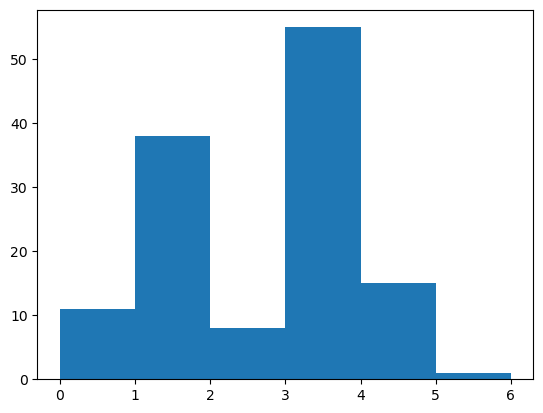

In [154]:
plt.hist(scores, bins= np.arange(7))

In [148]:
df_mlp = pd.read_csv('tokens_mlp.csv')
df_mlp.columns = ['Words', 'Original Index']


print(df_mlp.head())

                                               Words  Original Index
0  ['ays', 'ays', ' stuck', ' stuck', ' stuck', '...               1
1  [' Tree', ' pin', 'ony', 'ony', ' creatures', ...               2
2  [' should', ' should', ' correspondence', ' wo...               3
3  [' Cab', ' Raf', ' Raf', ' those', ' those', '...               4
4  [' will', ' will', ' would', ' would', ' would...               5


In [149]:
scores_mlp = []
for w in (df_mlp['Words']):
    s = int(scoring_interpretability(w))
    scores_mlp.append(s)

(array([ 4., 22.,  5., 72., 19.,  5.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

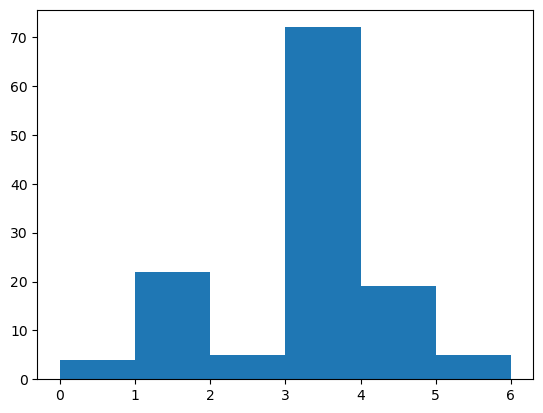

In [155]:
plt.hist(scores_mlp, bins= np.arange(7))

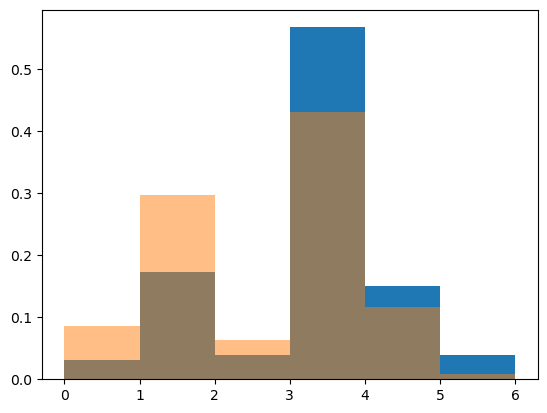

In [156]:
plt.hist(scores_mlp, density=True,  bins= np.arange(7))
plt.hist(scores, alpha = 0.5, density= True,  bins= np.arange(7))
plt.show()

In [158]:
scores_interpretable = []
for w in (df['Words']):
    s = int(scoring_interpretability(w))
    scores_interpretable.append(s)

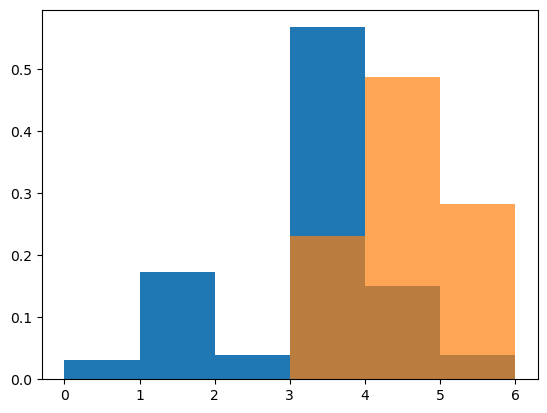

In [164]:
plt.hist(scores_mlp, density=True,  bins= np.arange(7))
#plt.hist(scores, alpha = 0.6, density= True,  bins= np.arange(7))
plt.hist(scores_interpretable,  alpha = 0.7, density= True,  bins= np.arange(7))
plt.show()